# Analisis de Datos de la I15 

In [1]:
import pandas as pd
import numpy as np
pd.set_option("precision", 3)

## Carga de la data. 
La base de datos SQL posee datos del 01-01-2018 al 31-12-2019 de todos los sensores (a excepción de algunos parecen no estar funcionando) que aparecen en la plataforma Bugatti FAST. De esta base de datos se exportó un dataset con los datos de los sensores pertenecientes a la I15_NB (I15 dirección norte). El dataset "lean" es el mismo dataset exportado eliminando las columnas de datos que no utilizo (Vease los drops que se encuentran comentados). Existen dos valores denominados "Invalid" -> [0, 1, 2, 3] y "Failure" -> [0 - 448] que aún no sé como utilizar porque no sé qué significan sus valores.

## Data loading 
The SQL database has data from 01-01-2018 to 31-12-2019 of all the sensors that appear in the Bugatti FAST dashboard (except for some that seem not to be working). From this database a dataset was exported with data from sensors belonging to the I15_NB (I15 northbound). The "lean" dataset is the same dataset exported, but eliminating the columns of data that I do not use (see commented "drops"). There are two values named "Invalid" -> [0, 1, 2, 3] and "Failure" -> [0 - 448] that I still don't know how to use because I don't know what their values mean.

In [2]:
data_file_name = "datasets/la_vegas/i15_bugatti/bugatti_nb_data_lean.csv"
#data_file_name = "datasets/la_vegas/i15_bugatti/bugatti_nb_data.csv"

data = pd.read_csv(data_file_name)
# data = data.drop(columns=['Path', 'RoadIndex', 'RoadwayID', 'SegmentID', 'DeviceID',
#                           #'Volume1', 'Volume2', 'Volume3', 'Volume4', 'Volume5', 'Volume6',
#                           'RoadType', 'Location', 'Polling_Period', 'DayOfWeek',
#                           'DateValue', 'HourIdx', 'Holiday'])
# data.to_csv('bugatti_data_lean.csv', index=False)

data.head(10)

,DateTimeStamp,Lane,Volume,Occupancy,Speed,Poll_Count,Failure,Invalid,DetectorID
0,2018-01-01 02:58:57,1,79,1,71,15,0,0,110.1.41
1,2018-01-01 02:58:57,2,197,5,72,15,0,0,110.1.41
2,2018-01-01 02:58:57,3,452,12,68,15,0,0,110.1.41
3,2018-01-01 02:58:57,4,416,11,65,15,0,0,110.1.41
4,2018-01-01 02:58:57,5,20,0,53,15,0,0,110.1.41
5,2018-01-01 02:58:57,2,21,0,77,15,0,0,438.1.331
6,2018-01-01 02:58:57,3,9,0,76,15,0,0,438.1.331
7,2018-01-01 02:58:57,1,38,0,75,15,0,0,439.2.333
8,2018-01-01 02:58:57,2,80,1,53,15,0,0,439.2.333
9,2018-01-01 02:58:57,3,5,0,56,15,0,0,439.2.333


Se realiza un mapeo de los ID de los detectores a una serie de números del "0" a "N - 1" (N= cantidad de detectores = 57). Dicha serie está ordenada según la ubicación de los detectores en la autopista, siendo "0" el detector que se encuentra más al Sur y "N-1" el que se encuentra más al Norte.

The detector IDs are mapped to a series of numbers from "0" to "N - 1" (N= number of detectors = 57). This series is ordered according to the location of the detectors on the highway, with "0" being the southernmost detector and "N-1" being the northernmost.

In [3]:
detectors_nb_list = ['440.1.335',
  '439.2.333',
  '439.3.332',
  '438.1.331',
  '438.2.330',
  '438.3.329',
  '358.1.325',
  '358.3.319',
  '357.1.312',
  '357.3.310',
  '356.1.309',
  '356.2.308',
  '355.1.156',
  '355.2.153',
  '355.3.155',
  '354.1.79',
  '354.2.144',
  '354.3.145',
  '32.1.142',
  '34.1.94',
  '39.2.88',
  '48.2.83',
  '49.1.82',
  '49.2.12',
  '49.3.15',
  '58.2.17',
  '59.1.18',
  '59.2.18',
  '70.2.21',
  '71.2.23',
  '72.1.22',
  '72.2.28',
  '89.1.28',
  '89.2.30',
  '97.1.33',
  '97.2.33',
  '97.3.38',
  '99.1.35',
  '110.1.41',
  '112.2.44',
  '113.2.45',
  '122.2.48',
  '124.2.49',
  '137.1.80',
  '138.1.53',
  '138.2.55',
  '146.2.238',
  '148.2.58',
  '149.2.240',
  '160.2.242',
  '396.1.243',
  '396.2.246',
  '396.3.246',
  '397.1.247',
  '397.2.248',
  '398.1.249',
  '398.2.251']
print(len(detectors_nb_list))
detector_id_map = {}
for i in range(len(detectors_nb_list)):
    detector_id_map[detectors_nb_list[i]] = i

data_detect_ID = data['DetectorID']

data_detect_new_ID = pd.Series([detector_id_map[i] for i in data_detect_ID])
print(data_detect_new_ID)
data['DetectID'] = data_detect_new_ID

57
0          38
1          38
2          38
3          38
4          38
           ..
9578979     5
9578980     5
9578981     2
9578982     2
9578983     2
Length: 9578984, dtype: int64


Se trasforma la columna 'DateTimeStamp' de string a un formato pd.datetime64 para poder ordenar los datos de forma cronológica y para poder analizar los períodos de muestreo.

The column 'DateTimeStamp' is transformed from string to a pd.datetime64 format to be able to sort the data chronologically and to be able to analyze the sampling periods.

In [4]:
data['DateTimeStamp'] = pd.to_datetime(data['DateTimeStamp'])
data = data.sort_values(by=['DateTimeStamp','DetectID'],ascending=[True, True])

date_time_obj = data['DateTimeStamp'].iloc[0]
print('Date:', date_time_obj.date())
print('Time:', date_time_obj.time())
print('Minute:', date_time_obj.time().minute)
print('Date-time:', date_time_obj)

print(data['DateTimeStamp'].unique())
print(len(data['DateTimeStamp'].unique()))

Date: 2018-01-01
Time: 00:12:14
Minute: 12
Date-time: 2018-01-01 00:12:14
['2018-01-01T00:12:14.000000000' '2018-01-01T00:27:23.000000000'
 '2018-01-01T00:42:32.000000000' ... '2019-12-31T22:57:48.000000000'
 '2019-12-31T23:37:46.000000000' '2019-12-31T23:53:19.000000000']
63092


Se realiza un análisis de los tiempos de muestreo.

An analysis of sampling times is performed.

In [5]:
date_unq = pd.Series(data['DateTimeStamp'].unique())
date_rest = []
date_rare = []
date_no_15 = []
for i in range(len(date_unq)-1):
    if date_unq[i+1].time().hour == date_unq[i].time().hour:
        rest = date_unq[i+1].time().minute - date_unq[i].time().minute
    elif (date_unq[i+1].time().hour > date_unq[i].time().hour) or ((date_unq[i+1].time().hour == 0) and (date_unq[i].time().hour == 23)):
        rest = date_unq[i+1].time().minute + 60 - date_unq[i].time().minute
    else:
        rest = -1
        date_rare.append([date_unq[i+1], date_unq[i]])
        #print("algo raro")
    date_rest.append(rest)
    if rest != 15:
        date_no_15.append([rest, date_unq[i+1], date_unq[i]])

print(f'\nTotal DateTimes = {len(date_unq)} vs Total DateTimes in 2 years with a period of 15 min = {(60/15)*24*365*2} --> DateLoss = {100 - (100*(len(date_unq)/((60/15)*24*365*2)))}')
print(f'Periods other than 15 min = {len(date_no_15)}\n')

# Datos Raros
print(f'Very high periods (2h a 2 días) = {len(date_rare)}')
print(date_rare)

num = list(np.unique(date_rest))
count = np.zeros(len(num))
for i in date_no_15:
    if i[0] in num:
        count[num.index(i[0])] += 1
count[num.index(15)] = len(date_unq) - len(date_no_15)

fusion = []
for i in range(len(num)):
    fusion.append([num[i], count[i]])
print('\nPeriods vs number of samples')
print(fusion)


Total DateTimes = 63092 vs Total DateTimes in 2 years with a period of 15 min = 70080.0 --> DateLoss = 9.971461187214615
Periods other than 15 min = 38470

Very high periods (2h a 2 días) = 21
[[Timestamp('2018-03-12 04:27:03'), Timestamp('2018-03-11 19:21:52')], [Timestamp('2018-03-19 05:03:36'), Timestamp('2018-03-18 23:15:16')], [Timestamp('2018-05-06 00:40:02'), Timestamp('2018-05-05 20:40:13')], [Timestamp('2018-05-10 07:46:46'), Timestamp('2018-05-08 22:17:57')], [Timestamp('2018-06-20 09:19:04'), Timestamp('2018-06-19 23:35:54')], [Timestamp('2019-02-16 16:36:11'), Timestamp('2019-02-15 22:58:57')], [Timestamp('2019-03-05 00:20:12'), Timestamp('2019-03-04 22:45:06')], [Timestamp('2019-03-21 07:58:58'), Timestamp('2019-03-20 22:57:41')], [Timestamp('2019-04-04 05:48:12'), Timestamp('2019-04-03 22:57:59')], [Timestamp('2019-04-15 06:05:32'), Timestamp('2019-04-14 22:57:04')], [Timestamp('2019-05-03 08:45:10'), Timestamp('2019-05-02 22:57:14')], [Timestamp('2019-05-15 05:31:00'), 

En primera instancia lo que se observa es que existen gaps o irregularidades en la frecuencia de muestreo de datos pues se tienen 63092 muestras en un plazo de 2 años, en vez de las 70080 que se deberían tener si se mantuviera un período de muestreo constante de 15min. De hecho más de la mitad de las muestras (38470) poseen un período de muestreo distinto a 15 minutos. De estas 38470 muestras, 24622 tienen un período de muestreo de 16 min, y 6627 lo tienen de 17 min, por lo que podemos decir que el 90% de las muestras se encuentra alrededor de los 15 min, con una desviación de +-2 min. El otro 10% varía muchisimo, llendo desde 1 minuto hasta casi 2 días en los caso más extremos.

Hay 21 casos con períodos de muestreo muy altos. La mayoría de estos se dan una vez al mes, siento el patro que más se repite: muestra ~22:30h y luego la siguiente muestra a las ~05:30h del día siguiente. Existe un sólo caso donde no hubo muestras por todo un día y parte del otro ([Timestamp('2018-05-10 07:46:46'), Timestamp('2018-05-08 22:17:57')] --> No hubo muestars el día 2018-05-09)

In the first instance we can observe that there are gaps or irregularities in the sampling periods, since there are 63.092 samples in a period of 2 years, instead of the 70.080 that should be had if a constant sampling period of 15 minutes were maintained. In fact, more than half of the samples (38.470) have a sampling period other than 15 minutes. Of these 38.470 samples, 24.622 have a sampling period of 16 min, and 6.627 have a sampling period of 17 min, so we can say that 90% of the samples are around 15 min, with a deviation of +-2 min. The other 10% varies a lot, ranging from 1 minute to almost 2 days in the most extreme cases.

There are 21 cases with very high sampling periods. The majority of these occur once a month, with the most repeated pattern being: a sample at ~22:30h and then the next sample at ~05:30h the following day. There is only one case where there were no samples for all day and part of the other ([Timestamp('2018-05-10 07:46:46'), Timestamp('2018-05-08 22:17:57')] --> No samples on 2018-05-09).

### Agrupamiento de la data
Se agrupa la data por DateTime y por DetectID. Esto se hace para que los valores de la variables para un detector sean el mean() de los valores de todas sus "Lanes".

### Data grouping
The data is grouped by DateTime and DetectID. This is done so that the values of the variables for a detector are the mean() of the values of all its "Lanes".

In [6]:
data = data.groupby(['DateTimeStamp','DetectID'], as_index=False).mean()

In [7]:
data.head(10)

,DateTimeStamp,DetectID,Lane,Volume,Occupancy,Speed,Poll_Count,Failure,Invalid
0,2018-01-01 00:12:14,1,2.0,18.000,0.333,62.667,15.0,0.0,0.0
1,2018-01-01 00:12:14,3,2.0,25.667,0.000,81.000,15.0,0.0,0.0
2,2018-01-01 00:12:14,4,2.0,21.333,0.000,78.333,15.0,0.0,0.0
3,2018-01-01 00:12:14,5,2.0,22.000,0.000,79.333,15.0,0.0,0.0
4,2018-01-01 00:12:14,6,2.0,32.000,0.333,67.667,14.0,0.0,0.0
5,2018-01-01 00:12:14,7,2.0,36.000,0.000,71.333,15.0,0.0,0.0
6,2018-01-01 00:12:14,8,2.0,31.333,0.000,64.667,15.0,0.0,0.0
7,2018-01-01 00:12:14,9,2.0,2.000,0.000,0.000,15.0,0.0,2.0
8,2018-01-01 00:12:14,10,2.0,36.000,0.000,74.000,15.0,0.0,0.0
9,2018-01-01 00:12:14,11,2.0,50.000,0.667,71.333,15.0,0.0,0.0


In [8]:
data.describe()

,DetectID,Lane,Volume,Occupancy,Speed,Poll_Count,Failure,Invalid
count,2.633e+06,2.633e+06,2.633e+06,2.633e+06,2.633e+06,2.633e+06,2.633e+06,2.633e+06
mean,2.640e+01,2.379e+00,1.599e+02,4.707e+00,5.342e+01,1.578e+01,4.237e-01,2.884e-01
std,1.600e+01,5.484e-01,1.636e+02,6.364e+00,2.225e+01,2.592e+00,7.293e+00,7.059e-01
min,0.000e+00,1.000e+00,-1.151e+04,0.000e+00,0.000e+00,1.000e+00,0.000e+00,0.000e+00
25%,1.300e+01,2.000e+00,5.400e+01,1.000e+00,4.900e+01,1.500e+01,0.000e+00,0.000e+00
50%,2.500e+01,2.000e+00,1.352e+02,3.000e+00,6.225e+01,1.500e+01,0.000e+00,0.000e+00
75%,3.800e+01,2.500e+00,2.330e+02,6.000e+00,6.800e+01,1.600e+01,0.000e+00,0.000e+00
max,5.600e+01,6.000e+00,3.903e+03,1.130e+02,9.167e+01,4.500e+01,4.480e+02,3.000e+00


In [9]:
data.describe(include=['datetime64[ns]', 'object'])

,DateTimeStamp
count,2633087
unique,63092
top,2018-01-13 10:36:10
freq,52
first,2018-01-01 00:12:14
last,2019-12-31 23:53:19


In [10]:
print(data.info())
print(f'Shape of the data = {data.shape}')
#print(data.columns)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2633087 entries, 0 to 2633086
Data columns (total 9 columns):
 #   Column         Dtype         
---  ------         -----         
 0   DateTimeStamp  datetime64[ns]
 1   DetectID       int64         
 2   Lane           float64       
 3   Volume         float64       
 4   Occupancy      float64       
 5   Speed          float64       
 6   Poll_Count     float64       
 7   Failure        float64       
 8   Invalid        float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 200.9 MB
None
Shape of the data = (2633087, 9)


In [ ]:
print('NA Count:')
print(data.isna().sum())

El siguiente es un histograma que representa el número de muestra que se tienen de cada detector. (Recordar que el número total de muestras de DateTime = 63092)

The following is a histogram representing the number of samples you have from each detector. (Recall that the total number of samples of DateTime = 63092)

In [ ]:
hist = data['DetectID'].hist(bins=len(data['DetectID'].unique()))

En la siguientes celdas se ven los números representados en el histograma en forma "total" y en forma de porcentaje con respecto al número total de muestras de DateTime.

In the next cells you see the numbers represented in the histogram in "total" form and as a "percentage" of the total number of DateTime samples.

In [ ]:
print('Samples by detector "Totals"')
data.groupby('DetectID')['DateTimeStamp'].count()

In [ ]:
print('Samples by detector "Percentage"')
data.groupby('DetectID')['DateTimeStamp'].count()*100/63092

NA Count:
DateTimeStamp    0
DetectID         0
Lane             0
Volume           0
Occupancy        0
Speed            0
Poll_Count       0
Failure          0
Invalid          0
dtype: int64


El siguiente es un histograma que representa el número de muestra que se tienen de cada detector. (Recordar que el número total de muestras de DateTime = 63092)

The following is a histogram representing the number of samples you have from each detector. (Recall that the total number of samples of DateTime = 63092)

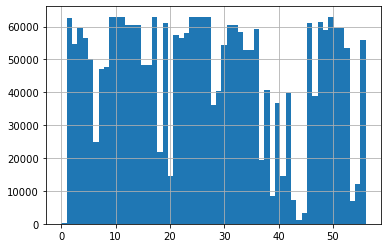

In [12]:
hist = data['DetectID'].hist(bins=len(data['DetectID'].unique()))

En la siguientes celdas se ven los números representados en el histograma en forma "total" y en forma de porcentaje con respecto al número total de muestras de DateTime.

In the next cells you see the numbers represented in the histogram in "total" form and as a "percentage" of the total number of DateTime samples.

In [13]:
print('Samples by detector "Totals"')
data.groupby('DetectID')['DateTimeStamp'].count()

Samples by detector "Totals"


DetectID
0       176
1     62701
2     54784
3     59540
4     56602
5     50024
6     24775
7     47119
8     47844
9     62978
10    62982
11    62982
12    60596
13    60524
14    60517
15    48381
16    48295
17    62924
18    21871
19    61054
20    14624
21    57331
22    56641
23    58031
24    62934
25    63011
26    62806
27    62819
28    36069
29    40514
30    54535
31    60403
32    60365
33    58334
34    52958
35    52960
36    59417
37    19489
38    40663
39     8431
40    36842
41    14629
42    39756
43     7227
44     1161
45     3216
46    61207
47    38986
48    61507
49    58838
50    62983
51    59657
52    59658
53    53402
54     6923
55    12083
56    56008
Name: DateTimeStamp, dtype: int64

In [14]:
print('Samples by detector "Percentage"')
data.groupby('DetectID')['DateTimeStamp'].count()*100/63092

Samples by detector "Percentage"


DetectID
0      0.279
1     99.380
2     86.832
3     94.370
4     89.713
5     79.287
6     39.268
7     74.683
8     75.832
9     99.819
10    99.826
11    99.826
12    96.044
13    95.930
14    95.919
15    76.683
16    76.547
17    99.734
18    34.665
19    96.770
20    23.179
21    90.869
22    89.775
23    91.978
24    99.750
25    99.872
26    99.547
27    99.567
28    57.169
29    64.214
30    86.437
31    95.738
32    95.678
33    92.459
34    83.938
35    83.941
36    94.175
37    30.890
38    64.450
39    13.363
40    58.394
41    23.187
42    63.013
43    11.455
44     1.840
45     5.097
46    97.012
47    61.792
48    97.488
49    93.257
50    99.827
51    94.556
52    94.557
53    84.641
54    10.973
55    19.151
56    88.772
Name: DateTimeStamp, dtype: float64